<a href="https://colab.research.google.com/github/Shoutaa/Pengolahan-Citra-_UAS/blob/main/Sobel_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOBEL DETECTION

## Edge Detection Process

### Import Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load dan Konversi Gambar ke Grayscale

In [ ]:
# Load the image
image_path = '/content/Lena.jpg'  # Ganti dengan path gambar Anda
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


### Menambahkan Noise Salt-and-Pepper pada Gambar Grayscale

In [ ]:
# Add salt-and-pepper noise to the grayscale image
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size
    # Add Salt noise
    num_salt = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    # Add Pepper noise
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0
    return noisy_image

# Add salt and pepper noise with a probability of 0.05 for salt and pepper each
noisy_image = add_salt_and_pepper_noise(gray_image, 0.05, 0.05)


### Mengurangi Noise dengan Median Filter

In [ ]:
# Apply Median filter to reduce salt-and-pepper noise
denoised_image = cv2.medianBlur(noisy_image, 5)  # Apply median blur with a kernel size of 5


### Deteksi Tepi Menggunakan Sobel

In [ ]:
# Apply Sobel edge detection
sobel_x = cv2.Sobel(denoised_image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel X
sobel_y = cv2.Sobel(denoised_image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Y
edges = cv2.magnitude(sobel_x, sobel_y)


### Thresholding pada Hasil Deteksi Tepi

In [ ]:
# Apply Thresholding to reduce noise in edge detection
_, edges_thresholded = cv2.threshold(edges, 50, 255, cv2.THRESH_BINARY)


### Menampilkan Semua Gambar

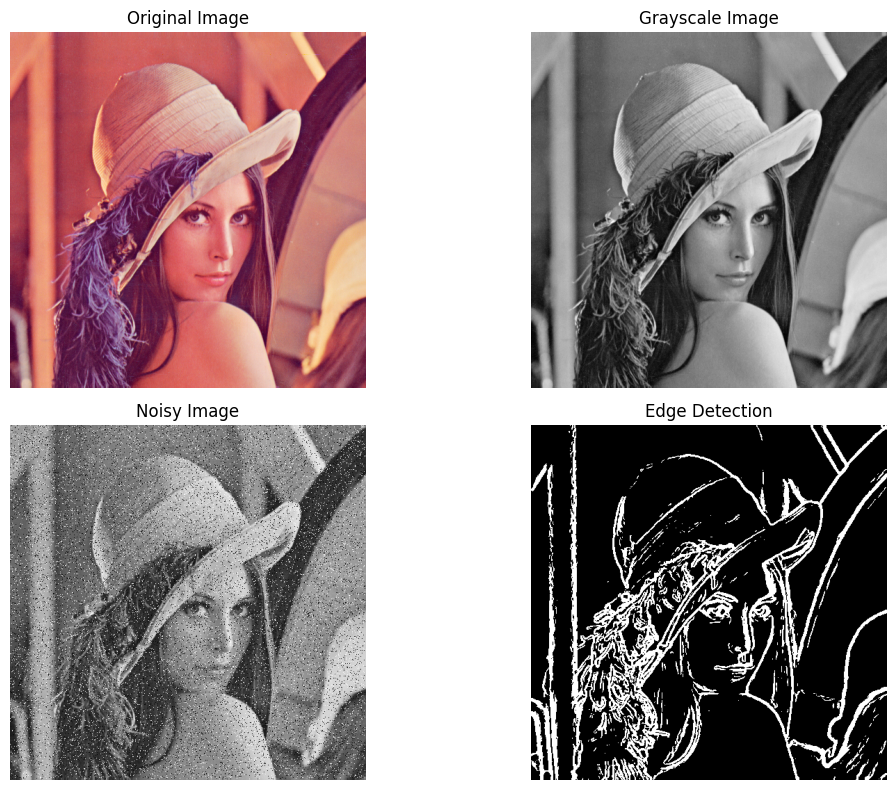

In [ ]:
# Plot all images
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Grayscale Image
plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# Noisy Image
plt.subplot(2, 2, 3)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

# Edge Detection
plt.subplot(2, 2, 4)
plt.imshow(edges_thresholded, cmap='gray')
plt.title("Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()


## Analysis of Experimental Results

### Import Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


### Load dan Konversi Gambar ke Grayscale

In [ ]:
# Load the image
image_path = '/content/Lena.jpg'  # Ganti dengan path gambar Anda
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


### Fungsi Deteksi Tepi Sobel dengan Threshold

In [ ]:
# Apply Sobel edge detection for different thresholds
def sobel_edge_detection(image, threshold):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel X
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Y
    edges = cv2.magnitude(sobel_x, sobel_y)
    _, thresholded_edges = cv2.threshold(edges, threshold, 255, cv2.THRESH_BINARY)
    return thresholded_edges


### Menggunakan Threshold yang Berbeda untuk Deteksi Tepi Sobel

In [ ]:
# Apply Sobel edge detection with different thresholds
threshold_1 = sobel_edge_detection(gray_image, 90)
threshold_2 = sobel_edge_detection(gray_image, 120)
threshold_3 = sobel_edge_detection(gray_image, 150)
threshold_4 = sobel_edge_detection(gray_image, 180)


### Menggunakan Adaptive Thresholding dengan Metode Mean

In [ ]:
# Apply Adaptive Thresholding methods
# Adaptive Threshold using Mean
adaptive_threshold_mean =  sobel_edge_detection(gray_image, 118)


### Menampilkan Semua Gambar

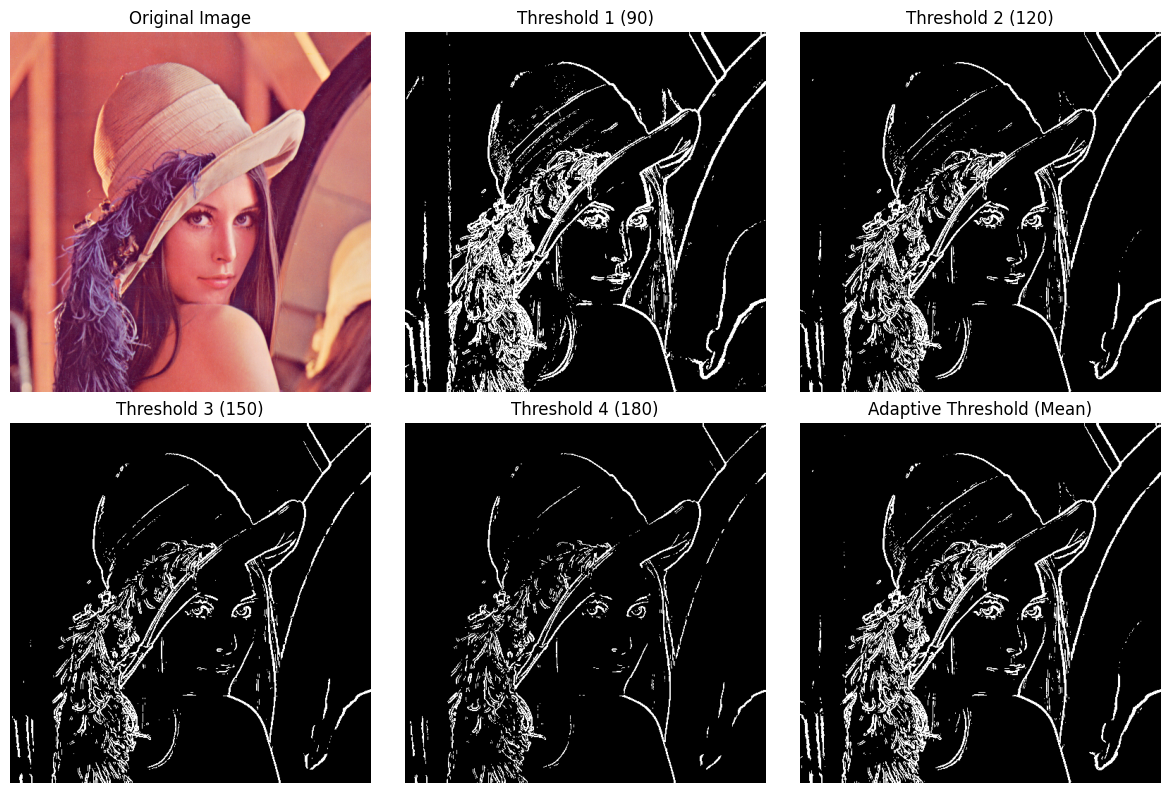

In [ ]:
# Plot all images
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Threshold 1
plt.subplot(2, 3, 2)
plt.imshow(threshold_1, cmap='gray')
plt.title("Threshold 1 (90)")
plt.axis('off')

# Threshold 2
plt.subplot(2, 3, 3)
plt.imshow(threshold_2, cmap='gray')
plt.title("Threshold 2 (120)")
plt.axis('off')

# Threshold 3
plt.subplot(2, 3, 4)
plt.imshow(threshold_3, cmap='gray')
plt.title("Threshold 3 (150)")
plt.axis('off')

# Threshold 4
plt.subplot(2, 3, 5)
plt.imshow(threshold_4, cmap='gray')
plt.title("Threshold 4 (180)")
plt.axis('off')

# Adaptive Threshold using Mean
plt.subplot(2, 3, 6)
plt.imshow(adaptive_threshold_mean, cmap='gray')
plt.title("Adaptive Threshold (Mean)")
plt.axis('off')

plt.tight_layout()
plt.show()
